======= Knuth/P-Tableau Equivalence Classes =======
[['1243', '1423', '4123'], ['1324', '1342', '3124'], ['1432', '4132', '4312'], ['2134', '2314', '2341'], ['2431', '4213', '4231'], ['3214', '3241', '3421'], ['2143', '2413'], ['3142', '3412'], ['1234'], ['4321']]
There are 10 equivalence classes.
first equiv. class to graph? 2
last equiv. class to graph? 8
Enter desired figure size: 25
======= Selected Graph Loading =======


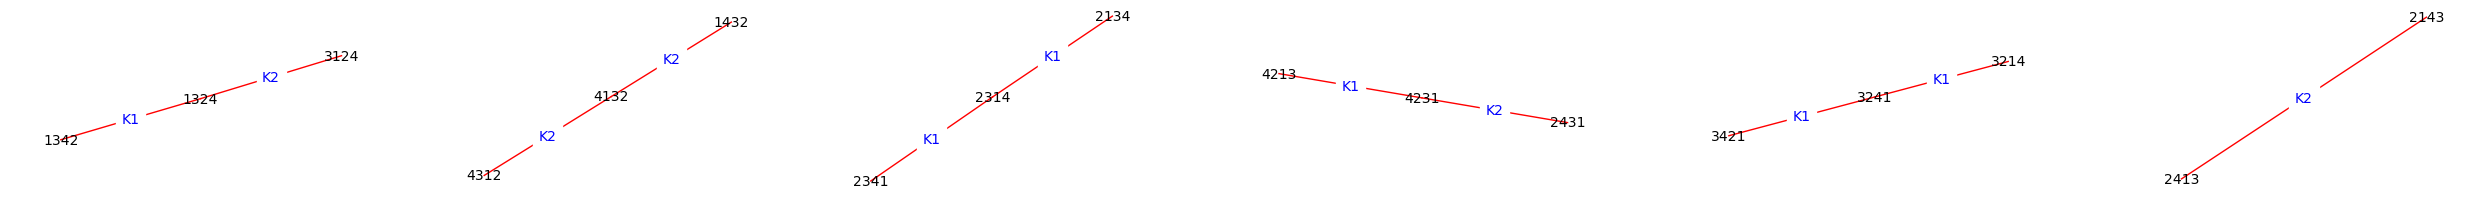

In [42]:
#IMPORTANT: RUN THE BELOW CELL BEFORE THIS ONE.

# INSTRUCTIONS:
# get_data is the main function of this program.
# n (INT) is the desired size of a permutation.
# show_equiv_classes (BOOL) determines whether or not a list of Knuth equiv. classes should be shown.
# show_graph (BOOL) determines whether not a graph is shown. Here there will be options for user input. Just in type and press enter.

#EXAMPLE:
get_data(n = 4, show_equiv_class_list = True, show_graph = True)

In [37]:
from multiprocessing import Pool
from sage.graphs.graph_input import from_dict_of_lists

def get_data(n, show_equiv_class_list, show_graph):
    g = Graph(generateData(n), weighted = True, loops=True)
    list_of_equiv_classes = g.connected_components()
    if show_equiv_class_list:
        print("======= Knuth/P-Tableau Equivalence Classes =======")
        print(list_of_equiv_classes)
        print("===================================================")
    if show_graph:
        print("There are", len(list_of_equiv_classes), "equivalence classes.")
        first_class = int(input("first equiv. class to graph? "))
        last_class = int(input("last equiv. class to graph? "))
        fs = int(input("Enter desired figure size: "))
        list_of_edges = generateData(n)
        desired_equiv_classes = list_of_equiv_classes[first_class-1:last_class-1]
        desired_elts = []
        for elt in desired_equiv_classes:
            for subelt in elt:
                desired_elts.append(subelt)
        display_edges = []
        for edge in list_of_edges:
            if edge[0] in desired_elts and edge[1] in desired_elts:
                display_edges.append(edge)
        g = Graph(display_edges, weighted = True, loops=True)
        print("======= Selected Graph Loading =======")
        g.show(edge_labels = True, figsize = fs, vertex_size=0, edge_color="#FF0000")

def Knuth_Moves_From_Perm(perm):
    permL = list(perm)
    Done = False
    result = []
    for index in range(len(perm)-2):
        permL = list(perm)
        elt1 = perm[index]
        elt2 = perm[index+1]
        elt3 = perm[index+2]
        testMiniPerm = perm[index:index+3]
        if has_2_1_3(testMiniPerm):
            permL[index+1]=elt3
            permL[index+2]=elt2
            type = "K1"
            info = (Permutation(permL), type)
        elif has_2_3_1(testMiniPerm):
            permL[index+1]=elt3
            permL[index+2]=elt2
            type = "K1"
            info = (Permutation(permL), type)
        elif has_3_1_2(testMiniPerm):
            permL[index]=elt2
            permL[index+1]=elt1
            type = "K2"
            info = (Permutation(permL), type)
        elif has_1_3_2(testMiniPerm):
            permL[index]=elt2
            permL[index+1]=elt1
            type = "K2"
            info = (Permutation(permL), type)
        else:
            info = []
        if len(info) > 0:
            result.append(info)
    return result

def getOutWord(ls):
    result = ""
    for elt in ls:
        result +=str(elt)
    return result

def removeDuplicates(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]
def generateData(n):
    resultDict = {}
    permList = list(Permutations(n))
    for elt in permList:
        resultDict[elt] = Knuth_Moves_From_Perm(elt)
    edges = []
    for perm in resultDict:
        edgeDataSlice = [str(getOutWord(perm))]
        if len(resultDict[perm])>0:
            for dataPiece in resultDict[perm]:
                edgeDataSlice.append(str(getOutWord(dataPiece[0])))
                edgeDataSlice.append(str(getOutWord(dataPiece[1])))
                edges.append(tuple(edgeDataSlice))
                edgeDataSlice = [str(getOutWord(perm))]
        else:
            edges.append((str(getOutWord(perm)), str(getOutWord(perm))))
    return edges

def has_2_1_3(perm):
    if perm[1]<perm[0]<perm[2]:
        return True
    else:
        return False
def has_1_3_2(perm):
    if perm[0]<perm[2]<perm[1]:
        return True
    else:
        return False
def has_3_1_2(perm):
    if perm[1]<perm[2]<perm[0]:
        return True
    else:
        return False
def has_2_3_1(perm):
    if perm[2]<perm[0]<perm[1]:
        return True
    else:
        return False